In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
import os

# os.mkdir('/content/drive/MyDrive/Kaggle/train_label_images')

dir_path = '/content/drive/MyDrive/DL-LinkNet/train_labels'
image_dir_path = '/content/drive/MyDrive/DL-LinkNet/train_label_images'
for file in os.listdir(dir_path):
  # print(os.path.join(dir_path, file))
  filename = os.path.splitext(file)[0]
  img_array = np.load(os.path.join(dir_path, file))
  cv2.imwrite(os.path.join(image_dir_path, filename + '.JPG'), img_array)


In [4]:

import tensorflow as tf
import os
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import time
import glob
import random
import pandas as pd

ids = pd.read_csv('/content/drive/MyDrive/DL-LinkNet/train and test ids.csv')
path = '/content/drive/MyDrive/DL-LinkNet/Images'
img_list_X_train = []
img_list_X_test = []
for i in ids['train_ids']:
    img_list_X_train.append(os.path.join(path,'crop_row_' + str(i).zfill(3) + '.jpg'))
for i in ids['test_ids']:
    if not np.isnan(i):
        img_list_X_test.append(os.path.join(path,'crop_row_' + str(int(i)).zfill(3) + '.jpg'))

In [6]:
img_list_X_test[5]

'/content/drive/MyDrive/DL-LinkNet/Images/crop_row_139.jpg'

In [9]:
img_list_X_train[5]

'/content/drive/MyDrive/DL-LinkNet/Images/crop_row_098.jpg'

In [10]:
img_width = 240
img_height = 240
img_channels = 3
number_of_init_filters = 16

In [11]:
X_train = np.zeros((len(img_list_X_train), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_train):
    # read image
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_train[i] = img_train

In [12]:
train_output_path1 = '/content/drive/MyDrive/DL-LinkNet/train_label_images'
img_list_y_train = []
for i in ids['train_ids']:
  #print(ids['train_ids'])
  img_list_y_train.append(os.path.join(train_output_path1,'crop_row_' + str(i).zfill(3) + '.JPG'))
print(len(img_list_y_train))
y_train = np.zeros((len(img_list_y_train), img_height, img_width, 1), dtype=bool)
print(len(y_train))
for i, img_path in enumerate(img_list_y_train):
    # read image
    print(i,img_path)
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, 1), mode='constant', preserve_range='True')
    y_train[i] = img_train

210
210
0 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_255.JPG
1 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_029.JPG
2 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_130.JPG
3 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_226.JPG
4 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_054.JPG
5 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_098.JPG
6 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_149.JPG
7 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_239.JPG
8 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_094.JPG
9 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_142.JPG
10 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_013.JPG
11 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_002.JPG
12 /content/drive/MyDrive/DL-LinkNet/train_label_images/crop_row_108.JPG
13 /content/drive/MyDrive/DL-LinkNet/train_label_imag

In [13]:
X_test = np.zeros((len(img_list_X_test), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_test):
    # read image
    img_test = imread(img_path)
    img_test = resize(img_test, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_test[i] = img_test

<ipython-input-14-3ee4fb8d5855>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(y_train[12])


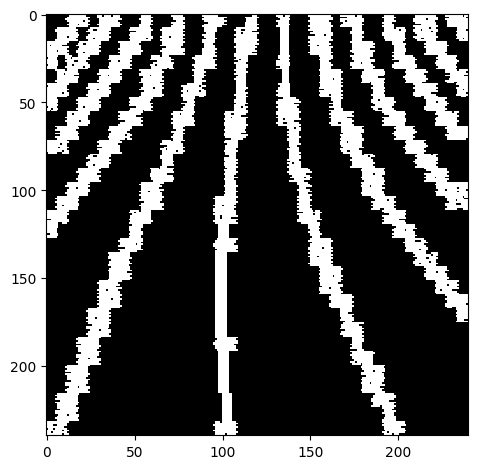

In [14]:
imshow(y_train[12])

In [15]:
inputs = tf.keras.layers.Input(shape=(img_height, img_width, img_channels), name="input_image")
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#Contractional path
cv1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(s)
cv2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(cv1)

#DS1
#fire module 1.1
f1_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(cv2)
f1_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1 = tf.keras.layers.concatenate([f1_1l,f1_1r])

#fire module 1.2
f1_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2 = tf.keras.layers.concatenate([f1_2l,f1_2r])
f1_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1', padding="same")(f1_2)

#DS2
#fire module 2.1
f2_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f2_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1 = tf.keras.layers.concatenate([f2_1l,f2_1r])

#fire module 2.2
f2_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2 = tf.keras.layers.concatenate([f2_2l,f2_2r])
f2_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool2', padding="same")(f2_2)


#DS3
#fire module 3.1
f3_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f3_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1 = tf.keras.layers.concatenate([f3_1l,f3_1r])

#fire module 3.2
f3_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2 = tf.keras.layers.concatenate([f3_2l,f3_2r])
f3_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3', padding="same")(f3_2)

#DS4
#fire module 4.1
f4_1 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f4_1l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1 = tf.keras.layers.concatenate([f4_1l,f4_1r])

#fire module 4.2
f4_2 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_2l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2 = tf.keras.layers.concatenate([f4_2l,f4_2r])
f4_2 = tf.keras.layers.Dropout(0.5)(f4_2)


#US1
#Transposed fire module
tf1_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*5, (1,1), strides=(1,1), padding='same', activation='relu')(f4_2)
tf1_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (1,1), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (2,2), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1 = tf.keras.layers.concatenate([tf1_1l,tf1_1r])
tf1_1 = tf.keras.layers.concatenate([tf1_1,f3_2])

#fire module 5.1
f5_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf1_1)
f5_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1 = tf.keras.layers.concatenate([f5_1l,f5_1r])

#fire module 5.2
f5_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2 = tf.keras.layers.concatenate([f5_2l,f5_2r])


#US2
#Transposed fire module
tf2_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(2,2), padding='same', activation='relu')(f5_2)
tf2_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (1,1), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (2,2), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1 = tf.keras.layers.concatenate([tf2_1l,tf2_1r])
tf2_1 = tf.keras.layers.concatenate([tf2_1,f2_2])

#fire module 6.1
f6_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf2_1)
f6_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1 = tf.keras.layers.concatenate([f6_1l,f6_1r])

#fire module 6.2
f6_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2 = tf.keras.layers.concatenate([f6_2l,f6_2r])


#US3
#Transposed fire module
tf3_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*3, (1,1), strides=(2,2), padding='same', activation='relu')(f6_2)
tf3_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1 = tf.keras.layers.concatenate([tf3_1l,tf3_1r])
tf3_1 = tf.keras.layers.concatenate([tf3_1,f1_2])

#fire module 6.1
f7_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf3_1)
f7_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1 = tf.keras.layers.concatenate([f7_1l,f7_1r])

#fire module 6.2
f7_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2 = tf.keras.layers.concatenate([f7_2l,f7_2r])

t9 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(2,2), padding='same', activation='relu')(f7_2)
c1 = tf.keras.layers.concatenate([t9,cv2])
cv3 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
cv4 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(cv3)


outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(cv4)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 240, 240,  │          0 │ input_image[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 240, 240,  │      1,792 │ lambda[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 240, 240,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 240, 240,  │      2,080 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 240, 240,  │      2,112 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 240, 240,  │     18,496 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 240, 240,  │          0 │ conv2d_3[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 240, 240,  │      4,128 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 240, 240,  │      2,112 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 240, 240,  │     18,496 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 240, 240,  │          0 │ conv2d_6[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 120, 120,  │          0 │ concatenate_1[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 120, 120,  │      6,192 │ pool1[0][0]       │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 120, 120,  │      6,272 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 120, 120,  │     55,424 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 120, 120,  │          0 │ conv2d_9[0][0], 

 Total params: 2,621,793 (10.00 MB)

 Trainable params: 2,621,793 (10.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# #Testing images

# img_list_y_test = sorted(glob.glob(test_expected_output))
# y_test = np.zeros((len(img_list_y_test), img_height, img_width, 1), dtype=np.bool)
# for i, img_path in enumerate(img_list_y_test):
#     # read image
#     img_test = imread(img_path)
#     img_test = resize(img_test, (img_height, img_width, 1), mode='constant', preserve_range='True')
#     y_test[i] = img_test

In [17]:
#Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

name = "SqueezeUnet-{}".format(int(time.time()))
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.TensorBoard(log_dir='tensorboard/{}'.format(name))]

results = model.fit(X_train, y_train, validation_split=0.1, batch_size=4, epochs=20, callbacks=callbacks)

#model.save("SqueezeUnet.h5")

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.7168 - loss: 0.5686 - val_accuracy: 0.7404 - val_loss: 0.5299
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.7491 - loss: 0.5117 - val_accuracy: 0.7481 - val_loss: 0.5396
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.7513 - loss: 0.5394 - val_accuracy: 0.7646 - val_loss: 0.4993
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.7575 - loss: 0.5136 - val_accuracy: 0.7715 - val_loss: 0.5012
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.7579 - loss: 0.5170 - val_accuracy: 0.7572 - val_loss: 0.4938
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.7529 - loss: 0.5047 - val_accuracy: 0.7629 - val_loss: 0.4782
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.7588 - loss: 0.4971 - val_accuracy: 0.7617 - val_loss: 0.4796
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.7472 - loss: 0.5196 - val_accuracy

<ipython-input-18-060956777531>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(X_train[ix])


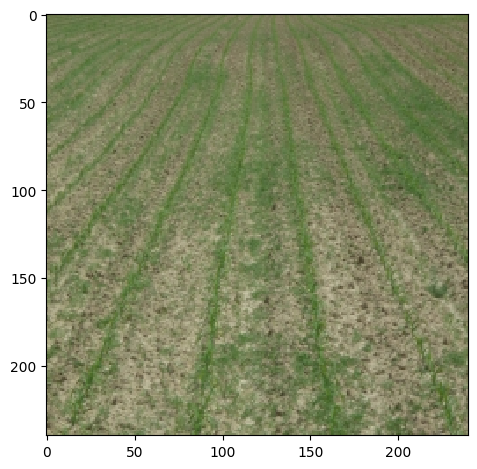

<ipython-input-18-060956777531>:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(y_train[ix]))


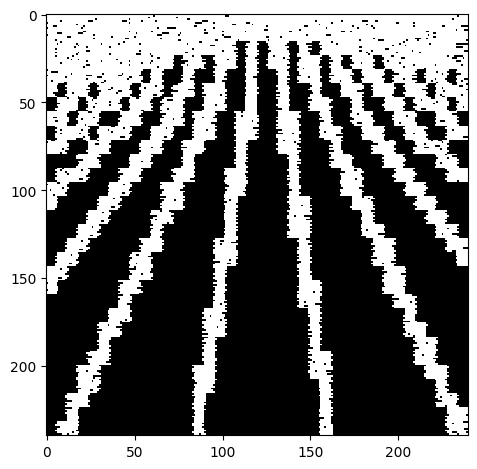

<ipython-input-18-060956777531>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(X_test[random.randint(0, len(img_list_X_test)-1)]))


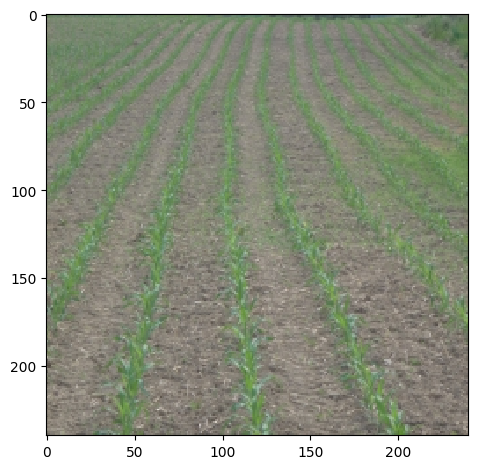

In [18]:
#plota uma amostra
ix = random.randint(0, len(img_list_X_train))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(X_test[random.randint(0, len(img_list_X_test)-1)]))
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_image']
Received: inputs=Tensor(shape=(32, 240, 240, 3))
  warnings.warn(msg)


5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_image']
Received: inputs=Tensor(shape=(None, 240, 240, 3))
  warnings.warn(msg)


6/6 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step


<ipython-input-19-f0d6c5995e8b>:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(X_test[idx])


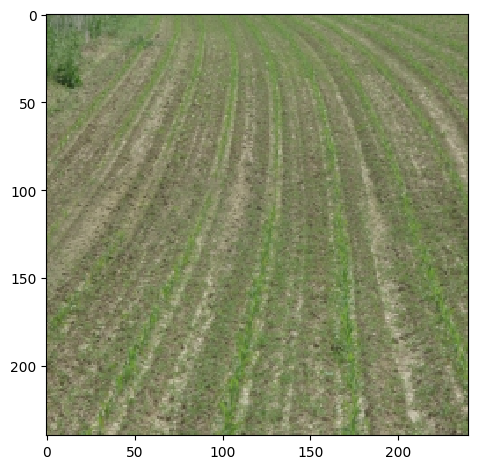

<ipython-input-19-f0d6c5995e8b>:12: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(preds_test_t[idx])
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


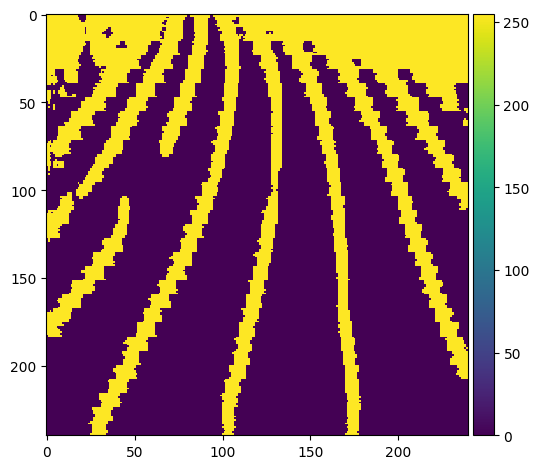

In [19]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train >0.5).astype(np.int32)
preds_val_t = (preds_val >0.5).astype(np.int32)
preds_test_t = (preds_test > 0.5).astype(np.int32) * 255

idx = random.randint(0, len(preds_test_t)-1)
imshow(X_test[idx])
plt.show()
imshow(preds_test_t[idx])
plt.show()

In [ ]:
preds_test_t.shape[0]

71

In [ ]:
def encode_mask_to_rle(mask):
    '''
    mask: numpy array binary mask
    255 - mask
    0 - background
    Returns encoded run length
    '''
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]

    return ' '.join(str(x) for x in runs)


def decode_rle_to_mask(rle, height = 240, width = 320):
    '''
    rle : run-length as string formated (start value, count)
    height : height of the mask
    width : width of the mask
    returns binary mask
    '''
    rle = np.array(rle.split(' ')).reshape(-1, 2)
    mask = np.zeros((height*width))
    color = 255
    for i in rle:
        mask[int(i[0]):int(i[0])+int(i[1])] = color

    return mask.reshape(height, width)

In [ ]:
rles = []

for i in range(preds_test_t.shape[0]):
    id = img_list_X_test[i][16:19]
    rle = encode_mask_to_rle(preds_test_t[i])
    rles.append(rle)

df = pd.DataFrame({'ids': [img_list_X_test[i][16:19]  for i in range(preds_test_t.shape[0])], 'labels': rles})



In [ ]:
df.to_csv('predictions2.csv', index=False)

In [ ]:
data = np.load("/content/drive/MyDrive/Kaggle/train_labels/crop_row_016.npy")
rle_enc = encode_mask_to_rle(data)
data.shape


FileNotFoundError: ignored